In [73]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt


# A1 Teil 1

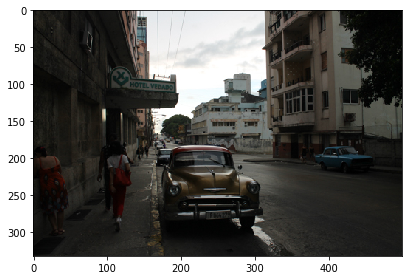

In [74]:
# load and display image skimage
img = io.imread("A1/bild01.jpg")
io.imshow(img)
io.show()

# load and display image opencv
#img = cv2.imread('A1/bild02.jpg')
#cv2.imshow("Image 2", img)
#cv2.waitKey(0)

In [75]:
# Datentyp:

print("Shape: " + str(img.shape))
print("DType: " + str(img.dtype))
print("Min: " + str(img.min()))
print("Max: " + str(img.max()))

Shape: (333, 500, 3)
DType: uint8
Min: 0
Max: 255


Green:


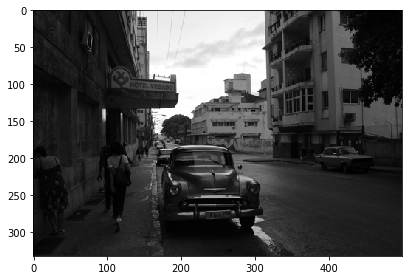

Red:


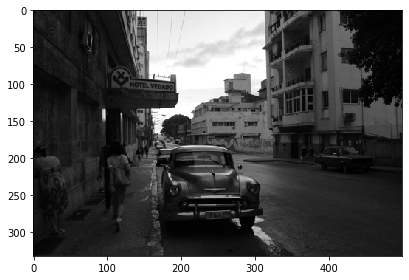

Blue:


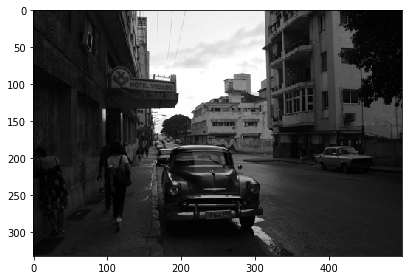

In [76]:
# Farbkanäle:
print("Green:")
green_img = img[:,:,1]
io.imshow(green_img)
io.show()

print("Red:")
red_img = img[:,:,0]
io.imshow(red_img)
io.show()

print("Blue:")
blue_img = img[:,:,2]
io.imshow(blue_img)
io.show()

Reference Image:


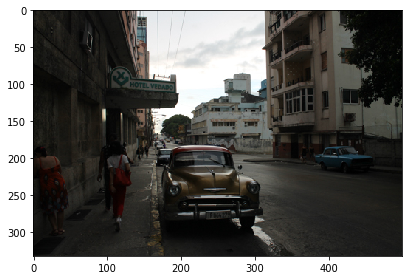

vertical mirrored Image:


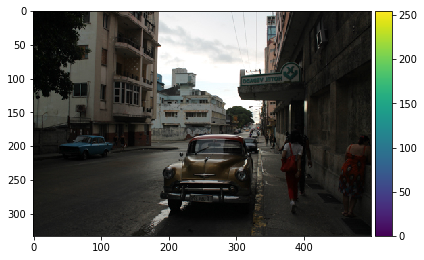

horizontal mirrored Image:


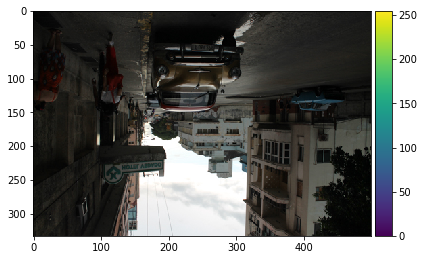

In [77]:
# mode 0 vertikal spiegeln, mode 1 horizontal
def mirror_img(t_img, mode=0):
    if mode == 0:
        inv_img = np.zeros(t_img.shape, int)
        col = t_img.shape[1]
        for x in range(col):
            inv_img[:, x] = t_img[:,col - x - 1]
        return inv_img
    elif mode == 1:
        inv_img = np.zeros(t_img.shape, int)
        rows = t_img.shape[0]
        for y in range(rows):
            inv_img[y] = t_img[rows - y - 1]
        return inv_img
    else:
        return t_img


print("Reference Image:")
io.imshow(img)
io.show()

print("vertical mirrored Image:")
io.imshow(mirror_img(img, mode=0))
io.show()

print("horizontal mirrored Image:")
io.imshow(mirror_img(img, mode=1))
io.show()

# A1 Teil 2

In [78]:
img_1 = io.imread("A1/bild01.jpg")
img_2 = io.imread("A1/bild02.jpg")
img_3 = io.imread("A1/bild03.jpg")
img_4 = io.imread("A1/bild04.jpg")
img_5 = io.imread("A1/bild05.jpg")

img_hidden = io.imread("A1/hidden.png")
img_monkey = io.imread("A1/monkey.jpg")
img_sea_wall = io.imread("A1/sea_wall.jpg")
img_wood = io.imread("A1/wood.jpg")

In [79]:
# transform image to grayscale
def rgb2gray(img):
    # Source BildverarbeitungBuch: 12.2.1 Umwandlung in Grauwertbilder
    imgCopy = np.copy(img)
    gray = ((imgCopy[:, :, 0] * 0.299) + (imgCopy[:, :, 1] * 0.587) + (imgCopy[:, :, 2] * 0.114)).astype(int)
    return gray

In [80]:
# create Histogramm. bins are optionally implemented
def computeHisto(t_img, bin=None):
    if bin is not None:
        K = 256
        B = np.math.ceil(K / bin)
        t_histo = np.zeros(B, int)

        for pixel in t_img.flatten():
            i = np.math.floor(pixel / bin)
            t_histo[i] += 1
        return t_histo
    else:
        t_histo = np.zeros(256, int)
        for pixel in t_img.flatten():
            t_histo[pixel] += 1
        return t_histo

In [81]:
# print your image
def printImage(t_img, grayscale=True):
    if grayscale:
        io.imshow(t_img, cmap=plt.cm.gray)
        io.show()
    else:
        io.imshow(t_img)
        io.show()


In [82]:
# print your Historgram
def printHisto(t_histo, t_img=None):
    # plot image
    if bin is not None:
        printImage(t_img, grayscale=True)

    # plot histogram
    n = t_histo.size
    x = range(n)
    width = 1
    plt.bar(x, t_histo, width, color="blue")
    plt.xlim([0, n - 1])
    plt.show()

Image 1:


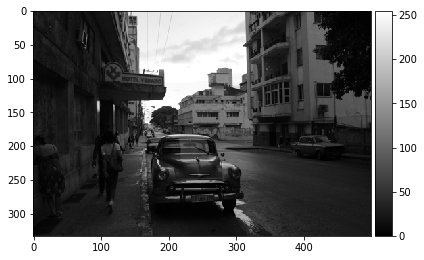

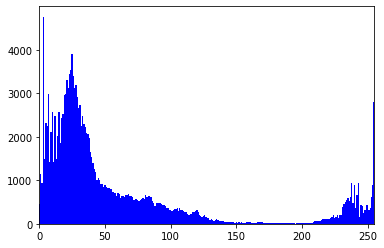

Image 2:


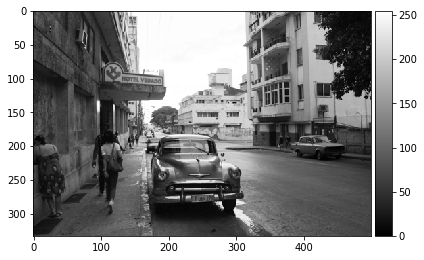

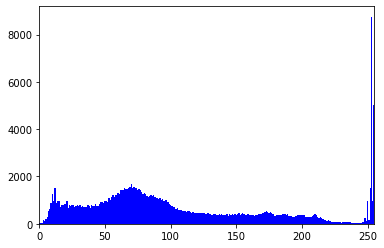

Image 3:


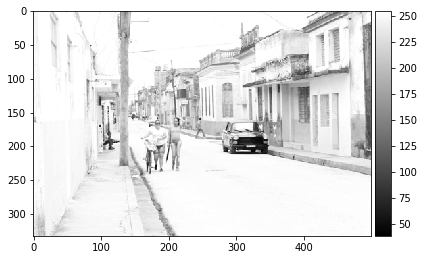

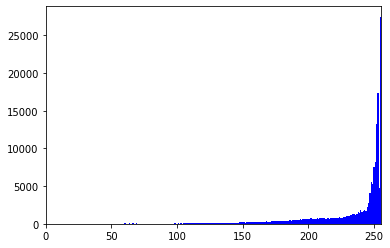

Image 4:


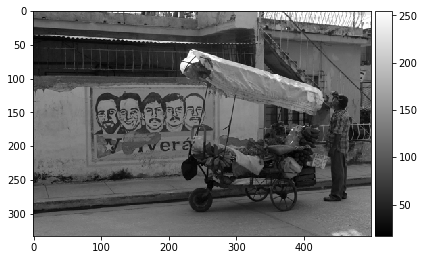

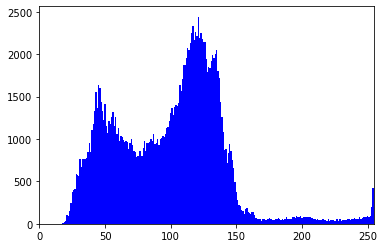

Image 5:


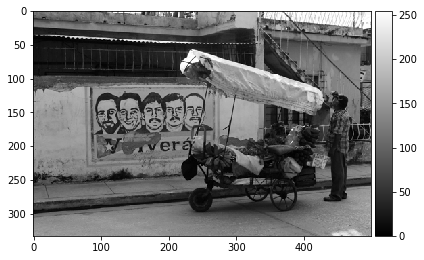

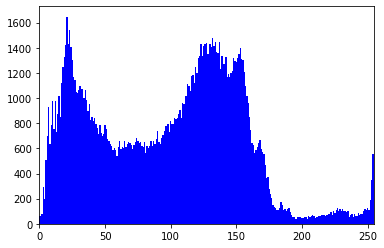

In [85]:
# Compute Histogramm for Image 1-5

print("Image 1:")
gray_img_1 = rgb2gray(img_1)
histo_gray_img_1 = computeHisto(gray_img_1)
printHisto(histo_gray_img_1, gray_img_1)

print("Image 2:")
gray_img_2 = rgb2gray(img_2)
histo_gray_img_2 = computeHisto(gray_img_2)
printHisto(histo_gray_img_2, gray_img_2)

print("Image 3:")
gray_img_3 = rgb2gray(img_3)
histo_gray_img_3 = computeHisto(gray_img_3)
printHisto(histo_gray_img_3, gray_img_3)

print("Image 4:")
gray_img_4 = rgb2gray(img_4)
histo_gray_img_4 = computeHisto(gray_img_4)
printHisto(histo_gray_img_4, gray_img_4)

print("Image 5:")
gray_img_5 = rgb2gray(img_5)
histo_gray_img_5 = computeHisto(gray_img_5)
printHisto(histo_gray_img_5, gray_img_5)

## Fragen zu den Bild Histogrammen:

### a) Welche Aufnahmefehler sind in 01 und 03 zu erkennen? Woran ist dies im Histogramm erkennbar?

01 unterbelichtet, histo -> hohe peaks im dunklen bereich
02 + 03 überbelichtet, histo -> hohe peaks im hellen bereich

### b) Bild01 ist das aufgenommene Bild. Bild02 wurde nachbearbeitet. Die Helligkeit wurde erhöht. Woran ist dies im Histogramm erkennbar? Welche Daten gehen dabei verloren?

Die Form des Histogramms ist quasi die selbe, jedoch wurden die dunklen Bereiche in richtung der hellen geschoben.
Verloren gehen dabei Informationen in den helleren Bereichen (clamping)
Das Bild wurde außerdem nicht nur aufgehellt, sondern vermutlich auch der Kontrast erhöht.
Das erkennt man daran, dass das Histogramm in die Breite gezogen wurde.

### c) Bild04 ist das aufgenommene Bild. Bild05 wurde einem Bearbeitungsschritt unterzogen. Was wurde in Bild05 ver¨andert? Woran kann man dies in seinem Histogramm erkennen?

Der Kontrast wurde erhöht. Das sieht man daran, dass das Histogramm breiter gezogen wurde, sodass der dunkelste Wert nun bei 0 anfängt.


<br />

# Punktoperation zum Aufhellen eines Bildes mithilfe eines Lookup Tables

### a) In Aufgabe (4b) gingen Daten beim Aufhellen eines Bildes verloren. Wie könnte dies vermieden werden?

Dies hätte beispielsweise mit der Verwendung einer Lookup-Tabelle vermieden werden können.
Dadurch kann nämlich sicher gestellt werden, dass in den Helleren Bereichen gar keine, oder nur eine schwache
Aufhellung stattfindet, wodurch die Daten nicht verloren gehen können.

### b) Damit beim Aufhellen von Bild01 keine Daten verloren gehen, soll eine Lookup-Tabelle verwendet werden. Versuchen Sie mit der Lookup-Tabelle die dunklen Bildbereiche des Bildes aufzuhellen ohne die hellen Bereiche zu stark zu verändern

Image 1 original:


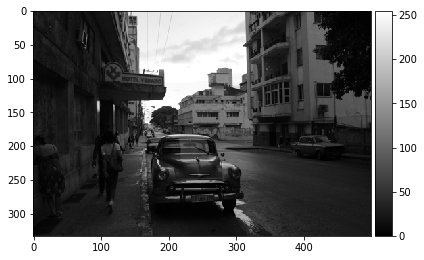

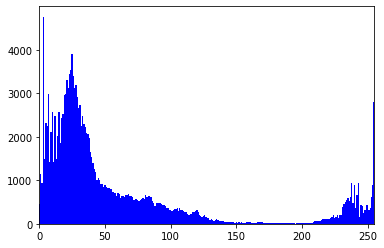

Image 1 modified with simple test lut:


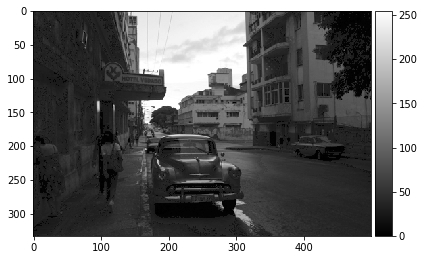

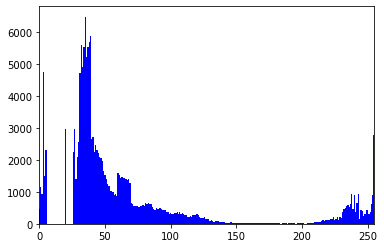

In [84]:
test_lut = [x for x in range(256)]
for i, entry in enumerate(test_lut):
    if 20 > entry > 5:
        test_lut[i] += 20
    if 60 > entry > 20:
        test_lut[i] += 10

def apply_lut(img, lut):
    for i, row in enumerate(img):
        for j, pixel in enumerate(row):
            img[i, j] = lut[pixel]
    return img

print("Image 1 original:")
printHisto(histo_gray_img_1, gray_img_1)

print("Image 1 modified with simple test lut:")
lut_img = apply_lut(rgb2gray(img_1), test_lut)
histo_gray_img_1_with_lut = computeHisto(lut_img)
printHisto(histo_gray_img_1_with_lut, lut_img)